In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
df = pd.read_csv('Ames Housing Data Encoding.csv')

In [4]:
df.head(10)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1960,1960,112.0,2,3,4,1080.0,1,1656,...,0,0,0,0,1,0,0,0,1,0
1,5,1961,1961,0.0,2,3,3,882.0,2,896,...,0,0,0,0,1,0,0,0,1,0
2,6,1958,1958,108.0,2,3,5,1329.0,2,1329,...,0,0,0,0,1,0,0,0,1,0
3,7,1968,1968,0.0,3,3,5,2110.0,4,2110,...,0,0,0,0,1,0,0,0,1,0
4,5,1997,1998,0.0,2,4,6,928.0,3,928,...,0,0,0,0,1,0,0,0,1,0
5,6,1998,1998,20.0,2,3,6,926.0,4,926,...,0,0,0,0,1,0,0,0,1,0
6,8,2001,2001,0.0,3,4,6,1338.0,4,1338,...,0,0,0,0,1,0,0,0,1,0
7,8,1992,1992,0.0,3,4,5,1280.0,4,1280,...,0,0,0,0,1,0,0,0,1,0
8,8,1995,1996,0.0,3,4,6,1595.0,4,1616,...,0,0,0,0,1,0,0,0,1,0
9,7,1999,1999,0.0,2,3,1,994.0,3,1028,...,0,0,0,0,1,0,0,0,1,0


In [5]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Ridge**

In [6]:
from sklearn.linear_model import RidgeCV

In [7]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [8]:
from sklearn.metrics import SCORERS

In [9]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [10]:
ridge_cv_model.alpha_

10.0

In [11]:
y_pred = ridge_cv_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
mean_squared_error(y_test,y_pred)

534804616.646542

In [14]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [15]:
RMSE

23125.843047260827

In [16]:
100*RMSE/df['SalePrice'].mean()

13.044318598746903

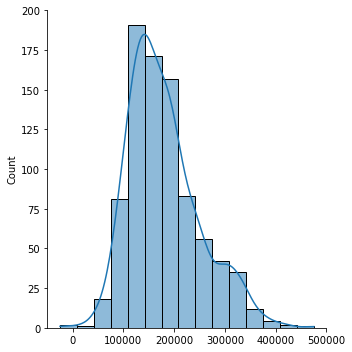

In [17]:
sns.displot(y_pred,bins=15,kde=True)

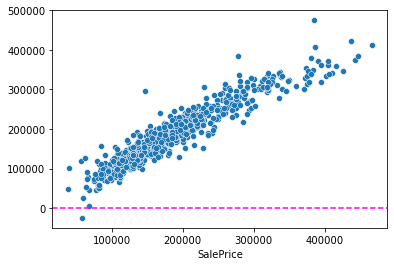

In [18]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

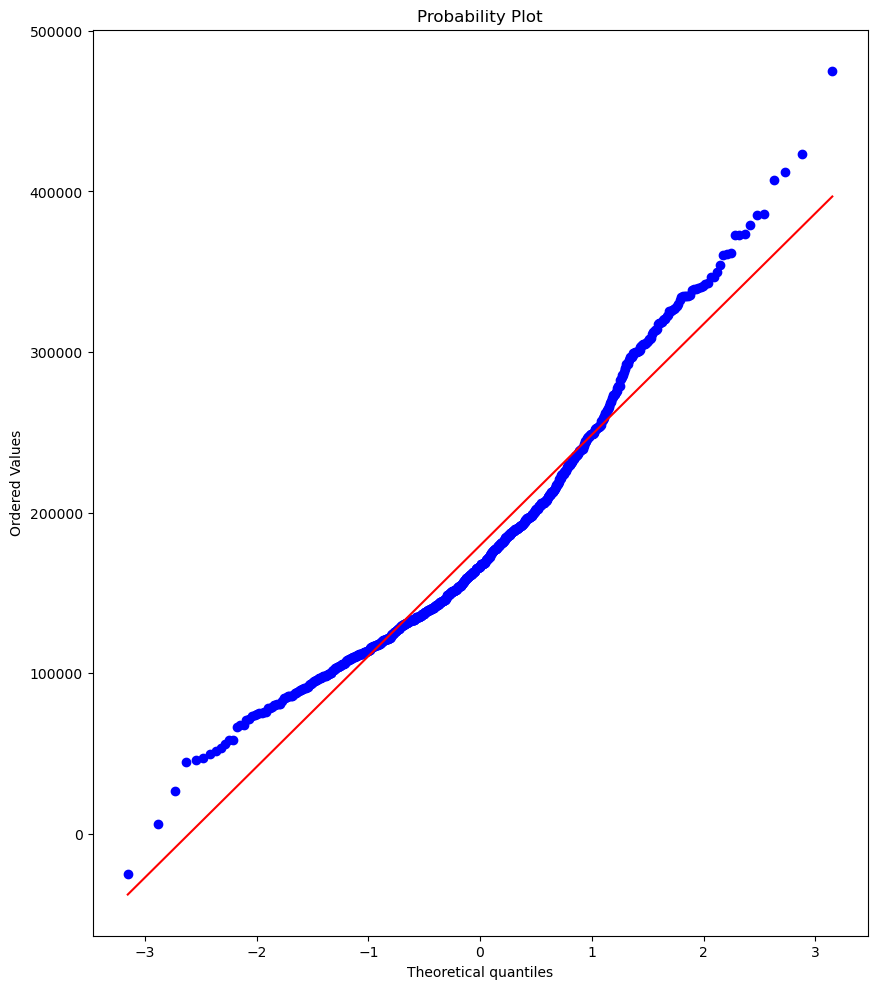

In [19]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

**Lasso**

In [20]:
from sklearn.linear_model import LassoCV

In [21]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=10)

In [22]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, eps=0.1)

In [23]:
lasso_cv_model.alpha_

5804.554389233217

In [24]:
test_predictions = lasso_cv_model.predict(X_test)

In [25]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [26]:
RMSE

26789.409639685564

In [27]:
100*RMSE/df['SalePrice'].mean()

15.110782932248215

**Elastic Net**

In [28]:
from sklearn.linear_model import ElasticNetCV

In [29]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],tol=0.01)

In [30]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [31]:
elastic_model.l1_ratio_

1.0

In [32]:
test_predictions = elastic_model.predict(X_test)

In [33]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [34]:
RMSE

22644.794635283422

In [35]:
100*RMSE/df['SalePrice'].mean()

12.772979355700462

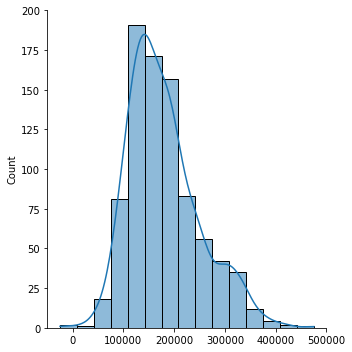

In [36]:
sns.displot(y_pred,bins=15,kde=True)

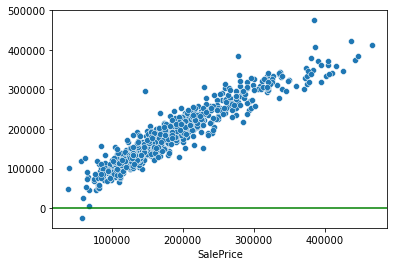

In [37]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axhline(y=0,color='green',linestyle='-')

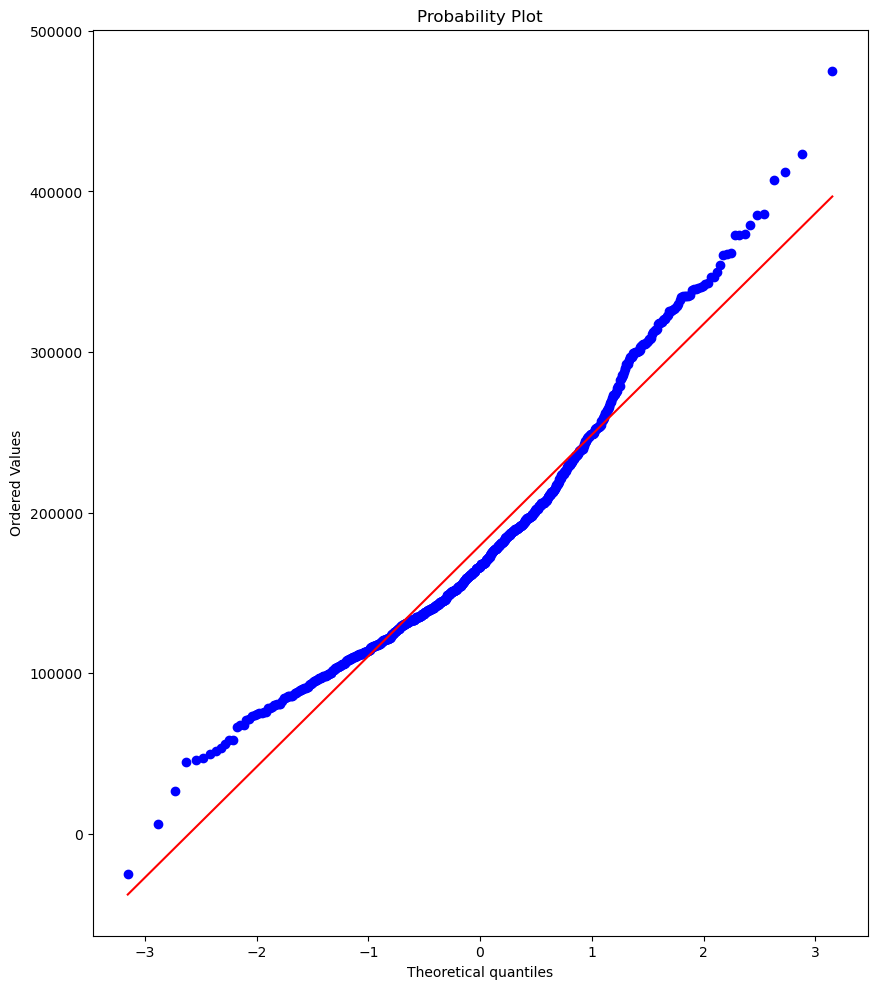

In [38]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

In [39]:
from sklearn.linear_model import ElasticNetCV

In [40]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],tol=0.01)

In [41]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [42]:
elastic_model.l1_ratio_

1.0

In [43]:
test_predictions = elastic_model.predict(X_test)

In [44]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [45]:
MAE

16212.853319271835

In [46]:
RMSE

22644.794635283422

In [47]:
100*RMSE/df['SalePrice'].mean()

12.772979355700462

In [48]:
elastic_model.coef_

array([ 1.13598848e+04,  3.65640880e+03,  3.85647193e+03,  4.29698976e+03,
        3.72012677e+03,  3.08464682e+03,  6.70508866e+03,  6.10400245e+03,
        1.22326617e+03,  3.46389270e+03,  2.20759141e+04, -8.51408296e+02,
        5.24102473e+03, -1.60487743e+03,  3.97870083e+03, -0.00000000e+00,
       -3.19877938e+02,  1.55973080e+03,  2.15663451e+03,  5.30648799e+03,
       -0.00000000e+00, -3.41410187e+02,  1.30873001e+02,  1.34811598e+03,
       -5.40752820e+00, -2.31903878e+02,  2.95650733e+03,  1.21565685e+03,
       -1.37141612e+02,  0.00000000e+00, -7.24543122e+02,  1.67858691e+03,
       -3.36542672e+02,  3.16292994e+02,  2.86169345e+01,  4.11660167e+02,
        9.50546364e+02,  5.40616691e+02,  9.70825670e+02, -5.73436040e+02,
        3.41427516e+03, -5.07697371e+01, -1.06039687e+03,  2.87104048e+02,
        3.57033397e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  7.32090503e+02, -8.18188694e+02,
        3.58569798e+03,  

In [49]:
arr = X.columns.Values
print(arr[0]+','arr[1]+','arr[3])

SyntaxError: invalid syntax (<ipython-input-49-d05aadeb92a0>, line 2)